#Importando Libs


In [1]:
!pip install pywaffle -q
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go, express as px
from pywaffle import Waffle


     |████████████████████████████████| 532kB 14.8MB/s 


#Lendo DataSets

In [2]:
df_ocorrencias = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_2010_2020.csv', sep=';', error_bad_lines=False)
df_tipo_ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo_2010_2020.csv', sep=';', error_bad_lines=False)
df_aeronave = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave_2010_2020.csv', sep=';', error_bad_lines=False)
df_fator = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/fator_contribuinte_2010_2020.csv', sep=';', error_bad_lines=False)
df_recomendacao = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/recomendacao_2010_2020.csv', sep=';', error_bad_lines=False)

## Limpando Dados

## Limpando DF Ocorrencias


In [3]:
#Checando se codigos de ocorrencia são iguais
all(df_ocorrencias['codigo_ocorrencia'] == df_ocorrencias['codigo_ocorrencia1'])\
  ==  all(df_ocorrencias['codigo_ocorrencia'] == df_ocorrencias['codigo_ocorrencia2'])\
    == all(df_ocorrencias['codigo_ocorrencia'] == df_ocorrencias['codigo_ocorrencia3'])\
      == all(df_ocorrencias['codigo_ocorrencia'] == df_ocorrencias['codigo_ocorrencia4']) 

True

In [4]:
df_ocorrencias.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,****,03/01/2010,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,03/01/2010,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
2,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,BRASIL,SBRJ,03/01/2010,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
3,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,****,04/01/2010,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
4,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,05/01/2010,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [5]:
df_ocorrencias.dtypes

codigo_ocorrencia                  int64
codigo_ocorrencia1                 int64
codigo_ocorrencia2                 int64
codigo_ocorrencia3                 int64
codigo_ocorrencia4                 int64
ocorrencia_classificacao          object
ocorrencia_latitude               object
ocorrencia_longitude              object
ocorrencia_cidade                 object
ocorrencia_uf                     object
ocorrencia_pais                   object
ocorrencia_aerodromo              object
ocorrencia_dia                    object
ocorrencia_hora                   object
investigacao_aeronave_liberada    object
investigacao_status               object
divulgacao_relatorio_numero       object
divulgacao_relatorio_publicado    object
divulgacao_dia_publicacao         object
total_recomendacoes                int64
total_aeronaves_envolvidas         int64
ocorrencia_saida_pista            object
dtype: object

In [6]:
df_ocorrencias.set_index('codigo_ocorrencia', inplace=True)
df_ocorrencias.drop(['codigo_ocorrencia1','codigo_ocorrencia2','codigo_ocorrencia3','codigo_ocorrencia4',
                  'ocorrencia_latitude','ocorrencia_longitude','ocorrencia_cidade','ocorrencia_aerodromo',
                 'investigacao_aeronave_liberada', 'divulgacao_relatorio_publicado','investigacao_status',
                 'divulgacao_relatorio_numero','ocorrencia_saida_pista', 'total_recomendacoes',
                 'divulgacao_dia_publicacao'], axis=1, inplace=True)
df_ocorrencias.replace('***', 'Não informado', inplace=True)
df_ocorrencias.head()

,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_pais,ocorrencia_dia,ocorrencia_hora,total_aeronaves_envolvidas
codigo_ocorrencia,,,,,,
40211,INCIDENTE,RJ,BRASIL,03/01/2010,12:00:00,1
40349,INCIDENTE,PA,BRASIL,03/01/2010,11:05:00,1
40351,INCIDENTE,RJ,BRASIL,03/01/2010,03:00:00,1
39527,ACIDENTE,MT,BRASIL,04/01/2010,17:30:00,1
40324,INCIDENTE,RS,BRASIL,05/01/2010,19:25:00,1


In [7]:
df_ocorrencias.dtypes

ocorrencia_classificacao      object
ocorrencia_uf                 object
ocorrencia_pais               object
ocorrencia_dia                object
ocorrencia_hora               object
total_aeronaves_envolvidas     int64
dtype: object

##Limpando DF tipo Ocorrencias


In [8]:
df_tipo_ocorrencia.head()

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,39115,PANE SECA,COMBUSTÍVEL | PANE SECA,FUEL
1,39155,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
2,39156,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO,F-NI
3,39158,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...,SCF-PP
4,39176,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP


In [9]:
df_tipo_ocorrencia.dtypes

codigo_ocorrencia1            int64
ocorrencia_tipo              object
ocorrencia_tipo_categoria    object
taxonomia_tipo_icao          object
dtype: object

In [10]:
df_tipo_ocorrencia.rename(columns={'codigo_ocorrencia1': 'codigo_ocorrencia'}, inplace=True)
df_tipo_ocorrencia.drop(['taxonomia_tipo_icao'], axis=1, inplace=True)
df_tipo_ocorrencia.set_index('codigo_ocorrencia', inplace=True)
df_tipo_ocorrencia.replace('***', 'Não informado', inplace=True)
df_tipo_ocorrencia.head()

,ocorrencia_tipo,ocorrencia_tipo_categoria
codigo_ocorrencia,,
39115,PANE SECA,COMBUSTÍVEL | PANE SECA
39155,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
39156,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO
39158,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...
39176,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...


In [11]:
### Separando as categorias ###
df_tipo_ocorrencia['ocorrencia_tipo_categoria'] = df_tipo_ocorrencia['ocorrencia_tipo_categoria'].apply(lambda s: s.split('|'))  
df_tipo_ocorrencia = df_tipo_ocorrencia.explode('ocorrencia_tipo_categoria')
df_tipo_ocorrencia.replace('***', 'Não informado', inplace=True)
df_tipo_ocorrencia.head()

,ocorrencia_tipo,ocorrencia_tipo_categoria
codigo_ocorrencia,,
39115,PANE SECA,COMBUSTÍVEL
39115,PANE SECA,PANE SECA
39155,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
39155,VAZAMENTO DE COMBUSTÍVEL,VAZAMENTO DE COMBUSTÍVEL
39156,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO)


In [12]:
df_tipo_ocorrencia.dtypes

ocorrencia_tipo              object
ocorrencia_tipo_categoria    object
dtype: object

##Limpando DF Fatores contribuintes



In [13]:
df_fator.head()

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,39115,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,39115,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,39115,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,39115,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,39115,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


In [14]:
df_fator.dtypes

codigo_ocorrencia3      int64
fator_nome             object
fator_aspecto          object
fator_condicionante    object
fator_area             object
dtype: object

In [15]:
df_fator.rename(columns={'codigo_ocorrencia3': 'codigo_ocorrencia'}, inplace=True)
df_fator.set_index('codigo_ocorrencia', inplace=True)
df_fator.replace('***', 'Não informado', inplace=True)
df_fator.head()

,fator_nome,fator_aspecto,fator_condicionante,fator_area
codigo_ocorrencia,,,,
39115,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
39115,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
39115,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
39115,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
39115,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


In [16]:
df_fator.dtypes

fator_nome             object
fator_aspecto          object
fator_condicionante    object
fator_area             object
dtype: object

## Limpando DF aeronaves

In [17]:
df_aeronave.head()

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,PTNQX,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,1202,4.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
1,39155,PTLVI,***,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,4377,8.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0
2,39156,PPPTO,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,22500,73.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0
3,39158,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,108862,108862,5.0,1984.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
4,39176,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,77000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0


In [18]:
df_aeronave.dtypes

codigo_ocorrencia2               int64
aeronave_matricula              object
aeronave_operador_categoria     object
aeronave_tipo_veiculo           object
aeronave_fabricante             object
aeronave_modelo                 object
aeronave_tipo_icao              object
aeronave_motor_tipo             object
aeronave_motor_quantidade       object
aeronave_pmd                     int64
aeronave_pmd_categoria           int64
aeronave_assentos              float64
aeronave_ano_fabricacao        float64
aeronave_pais_fabricante        object
aeronave_pais_registro          object
aeronave_registro_categoria     object
aeronave_registro_segmento      object
aeronave_voo_origem             object
aeronave_voo_destino            object
aeronave_fase_operacao          object
aeronave_tipo_operacao          object
aeronave_nivel_dano             object
aeronave_fatalidades_total       int64
dtype: object

In [19]:
df_aeronave.rename(columns={'codigo_ocorrencia2': 'codigo_ocorrencia'}, inplace=True)
df_aeronave.drop(['aeronave_matricula','aeronave_operador_categoria','aeronave_tipo_veiculo',
                  'aeronave_tipo_icao','aeronave_pmd','aeronave_pmd_categoria','aeronave_pais_fabricante',
                  'aeronave_voo_origem', 'aeronave_voo_destino', 'aeronave_pais_registro'], axis=1, inplace=True)
df_aeronave.set_index('codigo_ocorrencia', inplace=True)
df_aeronave.replace('***', 'Não informado', inplace=True)
df_aeronave.head()

,aeronave_fabricante,aeronave_modelo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
codigo_ocorrencia,,,,,,,,,,,,
39115,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,PISTÃO,MONOMOTOR,4.0,1979.0,AVIÃO,PARTICULAR,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
39155,BEECH AIRCRAFT,C90,TURBOÉLICE,BIMOTOR,8.0,1979.0,AVIÃO,PARTICULAR,DECOLAGEM,PRIVADA,NENHUM,0
39156,AEROSPATIALE AND ALENIA,ATR-72-212A,TURBOÉLICE,BIMOTOR,73.0,2008.0,AVIÃO,REGULAR,ARREMETIDA NO AR,REGULAR,LEVE,0
39158,BOEING COMPANY,757-225,JATO,BIMOTOR,5.0,1984.0,AVIÃO,REGULAR,SUBIDA,REGULAR,NENHUM,0
39176,AIRBUS INDUSTRIE,A320-232,JATO,BIMOTOR,184.0,2001.0,AVIÃO,REGULAR,SUBIDA,REGULAR,NENHUM,0


In [20]:
df_aeronave.dtypes

aeronave_fabricante             object
aeronave_modelo                 object
aeronave_motor_tipo             object
aeronave_motor_quantidade       object
aeronave_assentos              float64
aeronave_ano_fabricacao        float64
aeronave_registro_categoria     object
aeronave_registro_segmento      object
aeronave_fase_operacao          object
aeronave_tipo_operacao          object
aeronave_nivel_dano             object
aeronave_fatalidades_total       int64
dtype: object

#Vizualizando os Dados


### OCORRENCIAS POR ESTADO

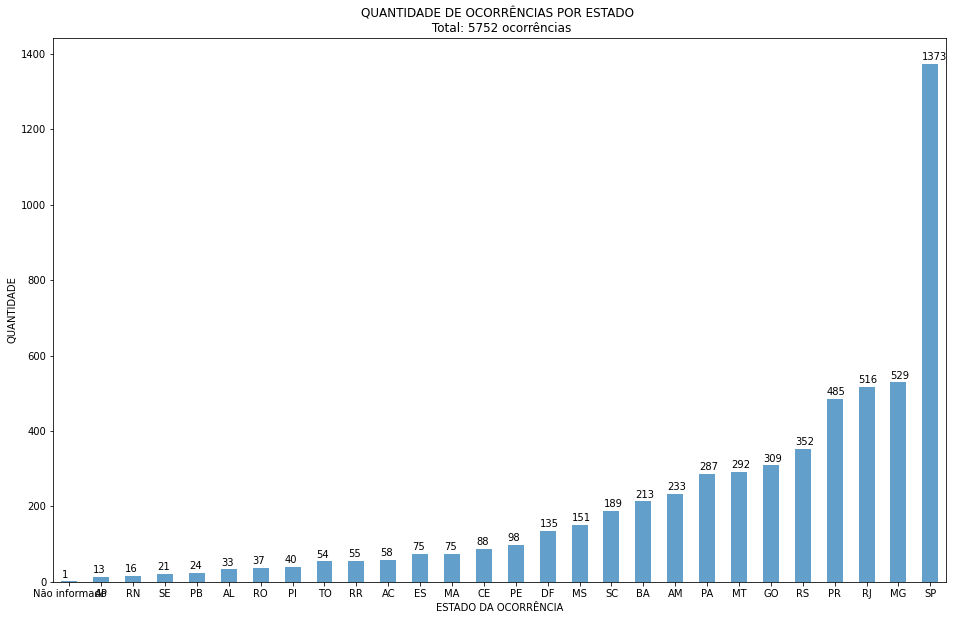

In [21]:
classificacao = df_ocorrencias.groupby('ocorrencia_uf').size()\
              .sort_values().plot(kind='bar', figsize=(16,10), alpha=.7)

for p in classificacao.patches:
    b=p.get_bbox()
    classificacao.annotate("{:.0f}".format(b.y1), (b.x0, b.y1 + 10))

plt.xticks(rotation=0)
plt.xlabel('ESTADO DA OCORRÊNCIA')
plt.ylabel('QUANTIDADE')
plt.title('QUANTIDADE DE OCORRÊNCIAS POR ESTADO \n Total: ' + str(df_ocorrencias['ocorrencia_uf'].count()) + ' ocorrências')
plt.show()

### OCORRENCIA POR CLASSIFICAÇÃO

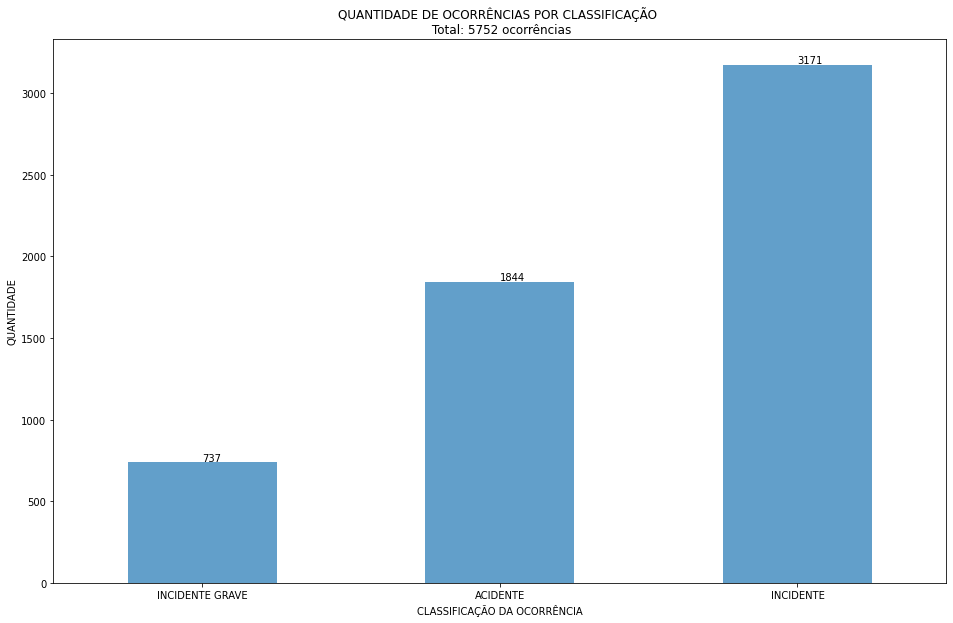

In [22]:
classificacao = df_ocorrencias.groupby('ocorrencia_classificacao').size()\
                .sort_values().plot(kind='bar', figsize=(16,10), alpha=.7)

for p in classificacao.patches:
    b=p.get_bbox()
    classificacao.annotate("{:.0f}".format(b.y1), ((b.x0 + b.x1)/2, b.y1 + 10))

plt.xticks(rotation=0)
plt.xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
plt.ylabel('QUANTIDADE')
plt.title('QUANTIDADE DE OCORRÊNCIAS POR CLASSIFICAÇÃO \n Total: ' + str(df_ocorrencias['ocorrencia_classificacao'].count()) + ' ocorrências')
plt.show()

### OCORRENCIA POR FASE DE OPERAÇÃO

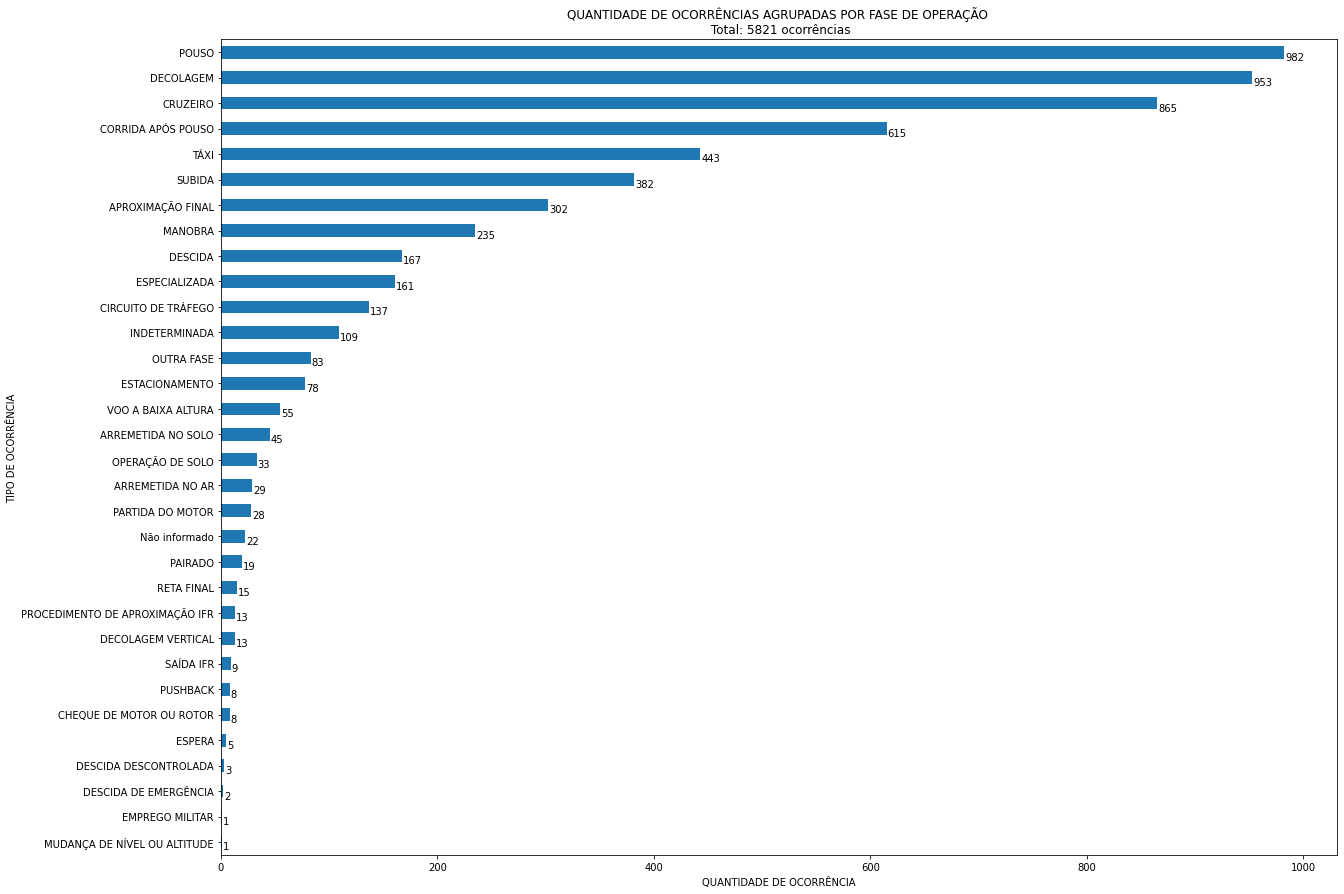

In [27]:
df = df_ocorrencias.join(df_aeronave).groupby('aeronave_fase_operacao').size()
ax = df.sort_values().plot(kind='barh', figsize=(20,15))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR FASE DE OPERAÇÃO \n Total: ' + str(df.sum()) + ' ocorrências')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
plt.show()

In [24]:
print('Porcentagem de ocorrencias durante a fase de cruzeiro: ', 
        round((df['POUSO'].sum() + df['DECOLAGEM'].sum()) / df.sum(), 2))
print('Porcentagem de ocorrencias durante a fase de cruzeiro: ',
        round(df['CRUZEIRO'].sum() / df.sum(), 2))

Porcentagem de ocorrencias durante a fase de cruzeiro:  0.33
Porcentagem de ocorrencias durante a fase de cruzeiro:  0.15


In [32]:
df = df_ocorrencias.join(df_aeronave)
df = df.loc[df['aeronave_fatalidades_total'] > 0]
df = df.groupby('aeronave_fase_operacao').size()
(df/ df.sum())

aeronave_fase_operacao
APROXIMAÇÃO FINAL        0.047945
ARREMETIDA NO AR         0.018265
ARREMETIDA NO SOLO       0.004566
CIRCUITO DE TRÁFEGO      0.031963
CORRIDA APÓS POUSO       0.006849
CRUZEIRO                 0.212329
DECOLAGEM                0.182648
DESCIDA                  0.029680
DESCIDA DESCONTROLADA    0.002283
ESPECIALIZADA            0.061644
INDETERMINADA            0.079909
MANOBRA                  0.130137
Não informado            0.015982
OPERAÇÃO DE SOLO         0.004566
OUTRA FASE               0.038813
PAIRADO                  0.004566
POUSO                    0.038813
RETA FINAL               0.002283
SAÍDA IFR                0.002283
SUBIDA                   0.045662
TÁXI                     0.002283
VOO A BAIXA ALTURA       0.036530
dtype: float64

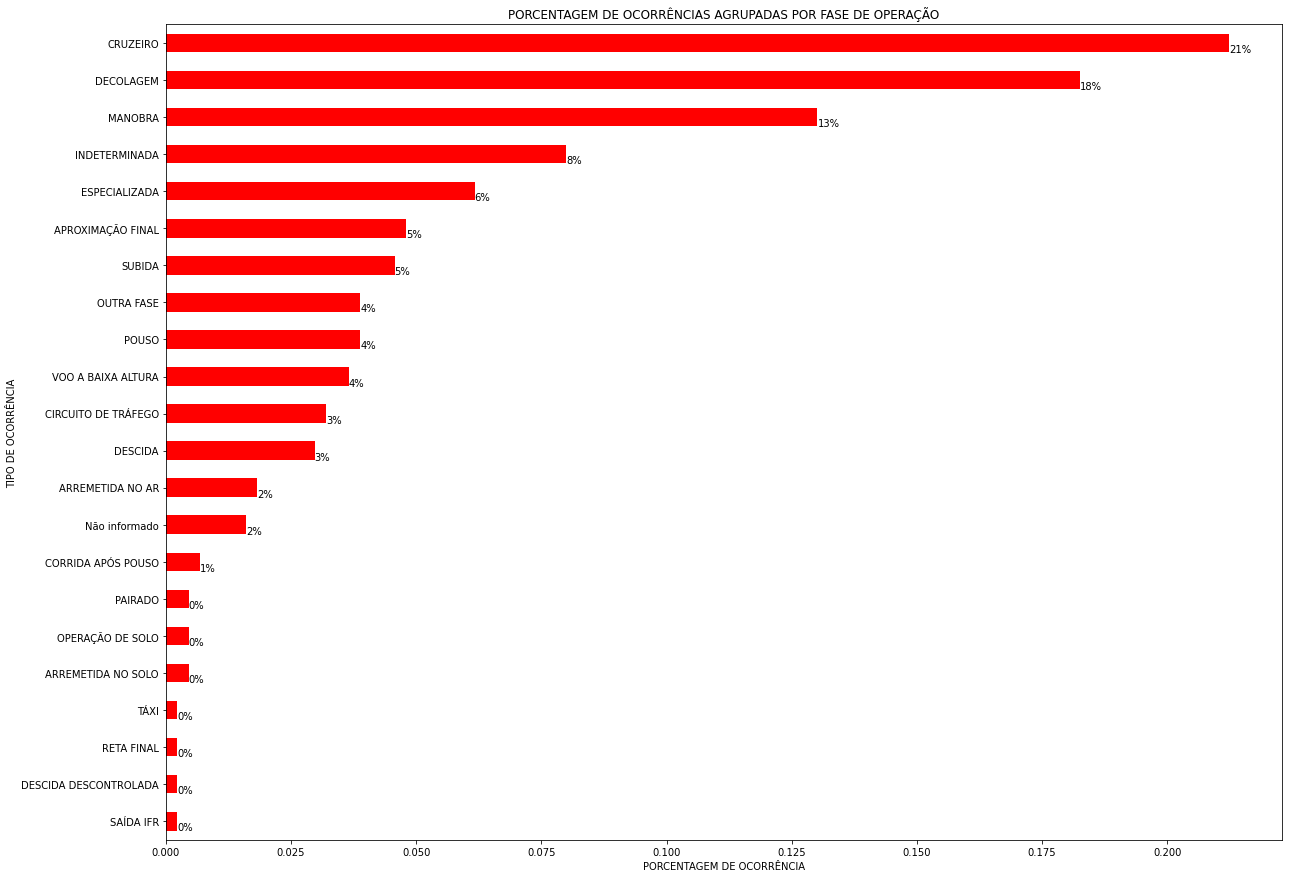

In [34]:
df = df_ocorrencias.join(df_aeronave)
df = df.loc[df['aeronave_fatalidades_total'] > 0]
df = df.groupby('aeronave_fase_operacao').size()
ax = (df/ df.sum()).sort_values().plot(kind='barh', color='red', figsize=(20,15))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format((b.x1 + b.x0) * 100) + '%', (p.get_x() + p.get_width(), p.get_y()))

plt.title('PORCENTAGEM DE OCORRÊNCIAS AGRUPADAS POR FASE DE OPERAÇÃO')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('PORCENTAGEM DE OCORRÊNCIA')
plt.show()

### OCORRENCIAS POR TIPO

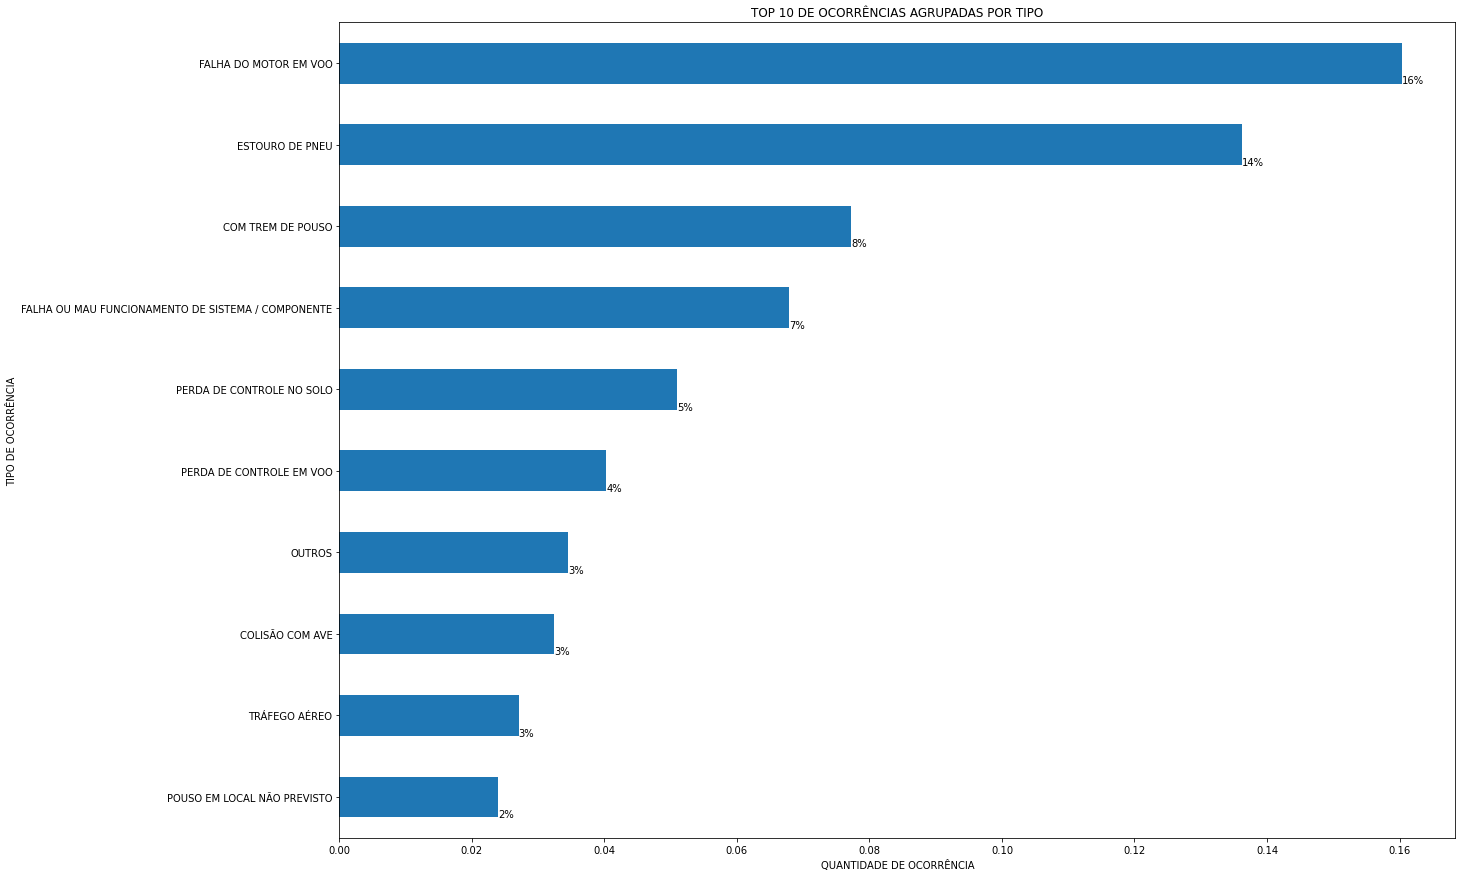

In [35]:
df = df_ocorrencias.join(df_tipo_ocorrencia).groupby('ocorrencia_tipo').size()
ax = (df/ df.sum()).sort_values().tail(10).plot(kind='barh', figsize=(20,15))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format((b.x1 + b.x0) * 100) + '%', (p.get_x() + p.get_width(), p.get_y() ))

plt.title('TOP 10 DE OCORRÊNCIAS AGRUPADAS POR TIPO')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
plt.show()

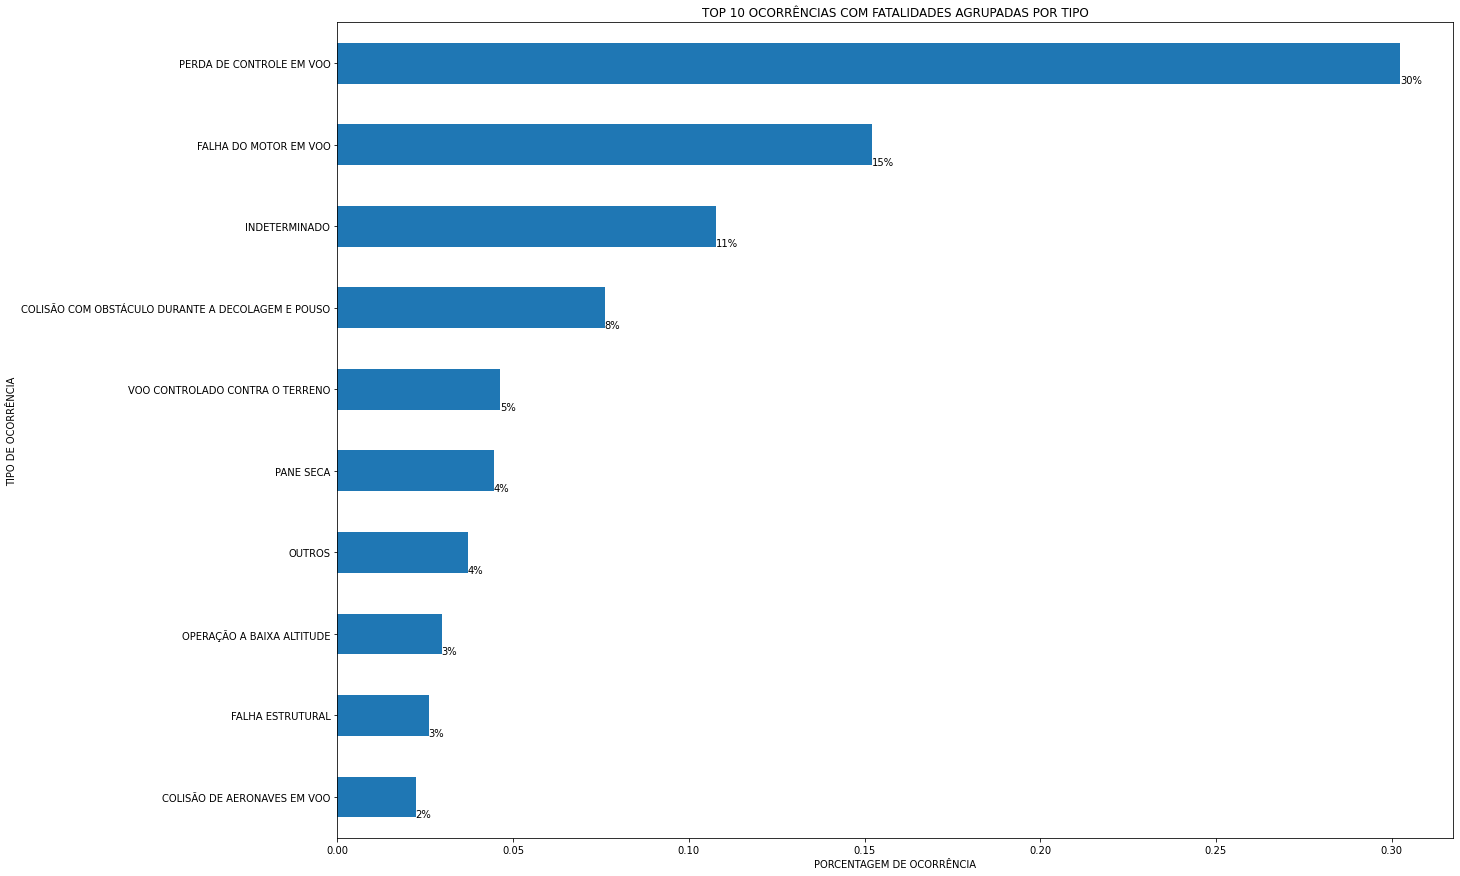

In [36]:
df = df_ocorrencias.join(df_tipo_ocorrencia).join(df_aeronave)
df = df.loc[df['aeronave_fatalidades_total'] > 0]
df = df.groupby('ocorrencia_tipo').size()
ax = (df/ df.sum()).sort_values().tail(10).plot(kind='barh', figsize=(20,15))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format((b.x1 + b.x0) * 100) + '%', (p.get_x() + p.get_width(), p.get_y() ))


plt.title('TOP 10 OCORRÊNCIAS COM FATALIDADES AGRUPADAS POR TIPO')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('PORCENTAGEM DE OCORRÊNCIA')
plt.show()

In [79]:
df= df_ocorrencias.join(df_tipo_ocorrencia).join(df_aeronave)
df['aeronave_assentos'].sort_values()

codigo_ocorrencia
78340    0.0
41155    0.0
41155    0.0
78640    0.0
78640    0.0
        ... 
79804    NaN
79804    NaN
79844    NaN
79844    NaN
79874    NaN
Name: aeronave_assentos, Length: 9139, dtype: float64

### OCORRÊNCIA POR FABRICANTE

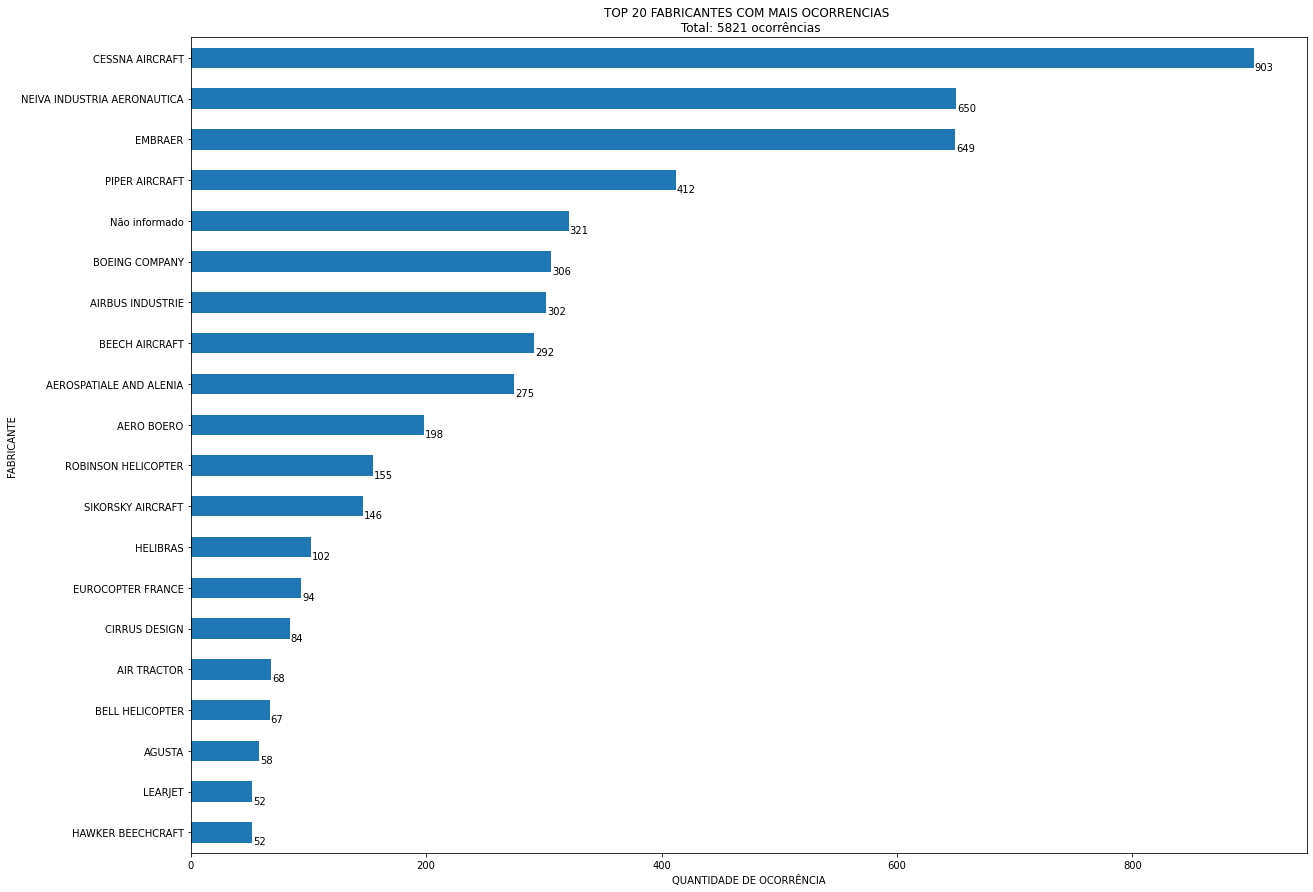

In [38]:
df = df_ocorrencias.join(df_aeronave).groupby('aeronave_fabricante').size()
ax = df.sort_values().tail(20).plot(kind='barh', figsize=(20,15))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('TOP 20 FABRICANTES COM MAIS OCORRENCIAS \n Total: ' + str(df.sum()) + ' ocorrências')
plt.ylabel('FABRICANTE')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
plt.show()

### OCORRÊNCIA POR QUANTIDADE DE PASSAGEIROS DA AERONAVE

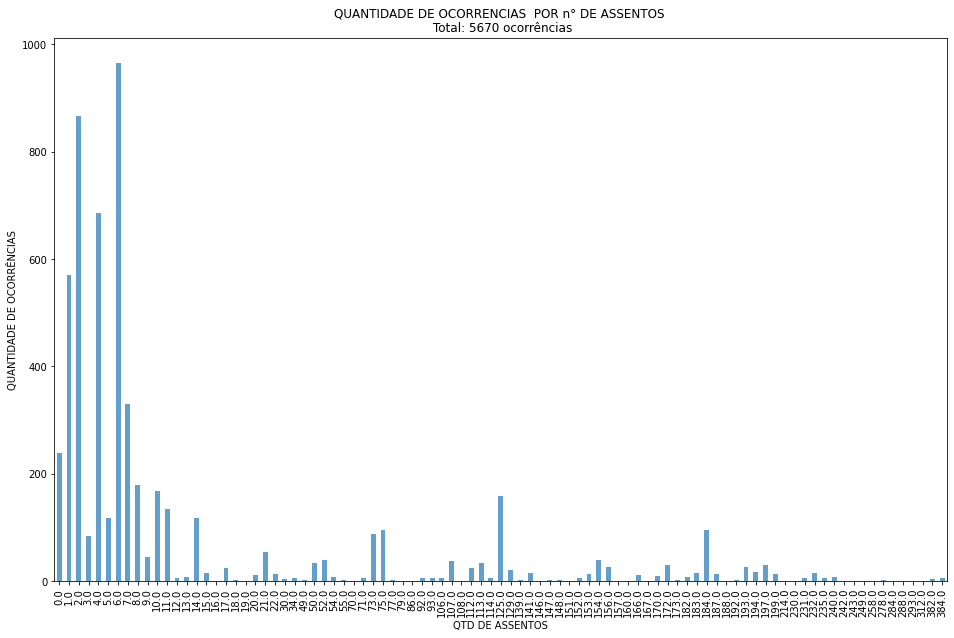

In [77]:

classificacao = df_ocorrencias.join(df_aeronave).groupby('aeronave_assentos').size()\
                .plot(kind='bar', figsize=(16,10), alpha=.7)

plt.title('QUANTIDADE DE OCORRENCIAS  POR n° DE ASSENTOS \n Total: ' + str(df.sum()) + ' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xlabel('QTD DE ASSENTOS')
plt.show()

In [82]:
  print('MEDIA DE N° DE ASSENTOS',  df_ocorrencias.join(df_aeronave)['aeronave_assentos'].mean())

MEDIA DE N° DE ASSENTOS 28.424867724867724


In [39]:
df_ocorrencias.join(df_aeronave)#.groupby('aeronave_fabricante').size()

,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_pais,ocorrencia_dia,ocorrencia_hora,total_aeronaves_envolvidas,aeronave_fabricante,aeronave_modelo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
codigo_ocorrencia,,,,,,,,,,,,,,,,,,
39115,ACIDENTE,BA,BRASIL,07/02/2010,17:40:00,1,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,PISTÃO,MONOMOTOR,4.0,1979.0,AVIÃO,PARTICULAR,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
39155,INCIDENTE,MG,BRASIL,05/02/2010,12:55:00,1,BEECH AIRCRAFT,C90,TURBOÉLICE,BIMOTOR,8.0,1979.0,AVIÃO,PARTICULAR,DECOLAGEM,PRIVADA,NENHUM,0
39156,INCIDENTE GRAVE,PR,BRASIL,10/01/2010,23:15:00,1,AEROSPATIALE AND ALENIA,ATR-72-212A,TURBOÉLICE,BIMOTOR,73.0,2008.0,AVIÃO,REGULAR,ARREMETIDA NO AR,REGULAR,LEVE,0
39158,INCIDENTE,PA,BRASIL,28/01/2010,16:00:00,1,BOEING COMPANY,757-225,JATO,BIMOTOR,5.0,1984.0,AVIÃO,REGULAR,SUBIDA,REGULAR,NENHUM,0
39176,INCIDENTE,MA,BRASIL,05/02/2010,09:30:00,1,AIRBUS INDUSTRIE,A320-232,JATO,BIMOTOR,184.0,2001.0,AVIÃO,REGULAR,SUBIDA,REGULAR,NENHUM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79802,INCIDENTE,RJ,BRASIL,30/12/2020,00:54:00,1,BOEING COMPANY,737-8EH,JATO,BIMOTOR,193.0,2010.0,AVIÃO,REGULAR,SUBIDA,REGULAR,NENHUM,0
79804,INCIDENTE,SP,BRASIL,29/12/2020,19:00:00,1,BOEING COMPANY,737-48E,JATO,BIMOTOR,NaN,NaN,Não informado,REGULAR,DESCIDA,REGULAR,NENHUM,0
79824,ACIDENTE,MG,BRASIL,28/12/2020,17:00:00,1,PIPER AIRCRAFT,PA-25-235,PISTÃO,MONOMOTOR,1.0,0.0,AVIÃO,AGRÍCOLA,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0


### OCORRENCIAS POR TIPO DE MOTOR

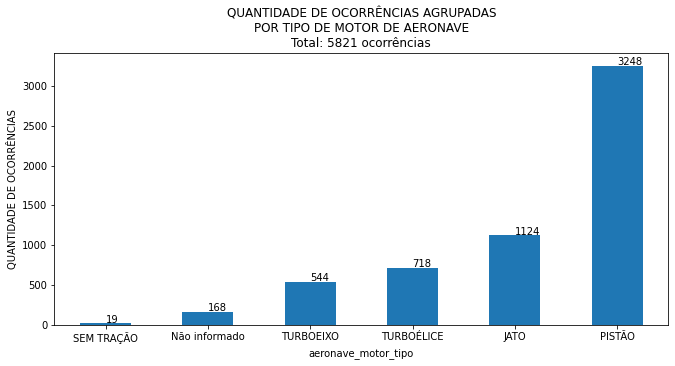

In [40]:
df = df_ocorrencias.join(df_aeronave).groupby('aeronave_motor_tipo').size()
ax = df.sort_values().plot(kind='bar', figsize=(11,5))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2, b.y1 + 10))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS\nPOR TIPO DE MOTOR DE AERONAVE\nTotal: '+str(df.sum())+' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=0)
plt.show()

### TIPO DE OCORRENCIAS EM AERONAVES COM MOTOR TIPO PISTÃO

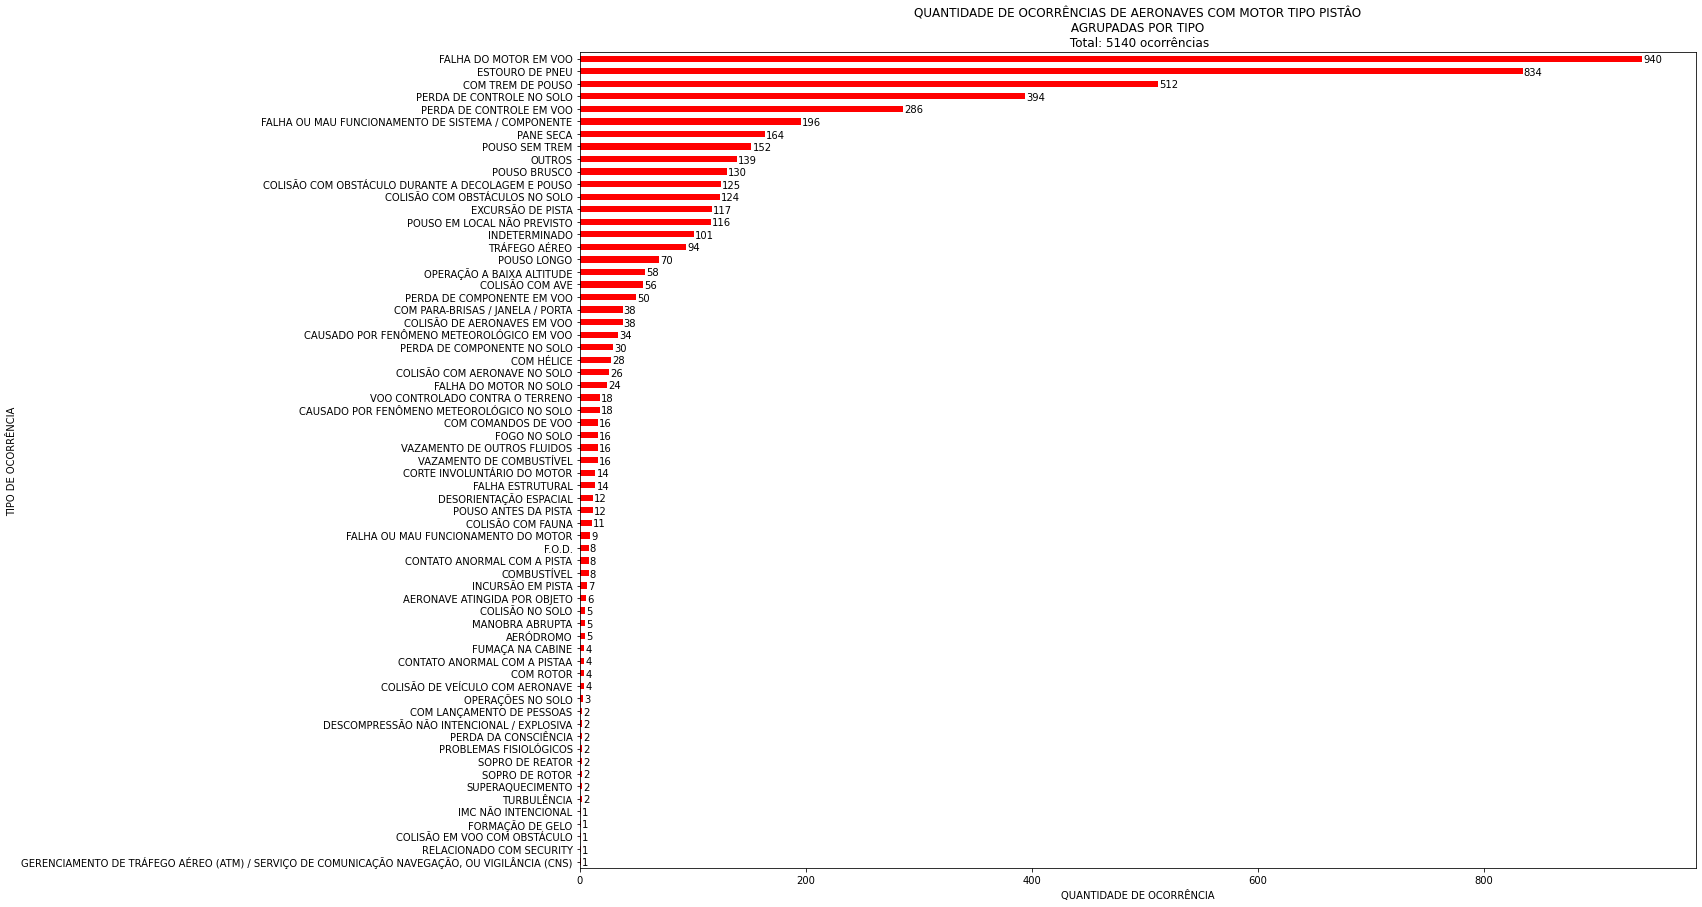

In [41]:
df = df_tipo_ocorrencia.join(df_aeronave)
df = df.loc[df['aeronave_motor_tipo'] == 'PISTÃO']

df = df.groupby('ocorrencia_tipo').size()
ax = df.sort_values().plot(kind='barh', color='red', figsize=(20,15))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE OCORRÊNCIAS DE AERONAVES COM MOTOR TIPO PISTÂO\n AGRUPADAS POR TIPO \n Total: ' + str(df.sum()) + ' ocorrências')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
plt.show()

In [42]:
df = df_tipo_ocorrencia.join(df_aeronave)
df = df.loc[df['aeronave_motor_tipo'] == 'PISTÃO']

df = df.groupby('ocorrencia_tipo').size()

### FATALIDADES E OCORRENCIAS AO LONGO DO TEMPO

#### POR ANO

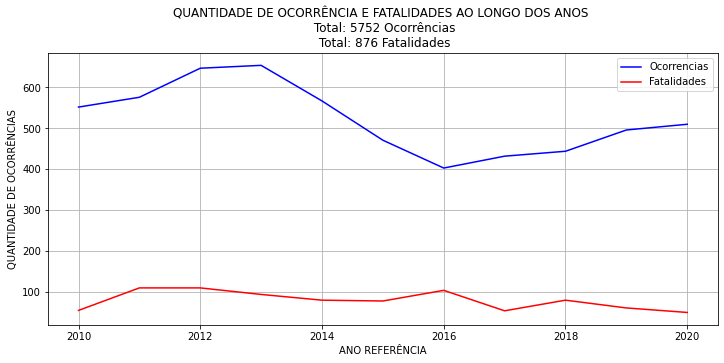

In [43]:
df = df_ocorrencias.copy()
df['ocorrencia_dia'] = df['ocorrencia_dia'].apply(lambda x: x[-4:])
df_acidentes = df.groupby('ocorrencia_dia').size()
df_acidentes.plot(color='blue', figsize=(12,5), grid=True)
df_fatalidades = df.join(df_aeronave).groupby('ocorrencia_dia')['aeronave_fatalidades_total'].sum()
df_fatalidades.plot(color='red', figsize=(12,5), grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIA E FATALIDADES AO LONGO DOS ANOS \n Total: ' + str(df_acidentes.sum()) + ' Ocorrências\n Total: '+ str(df_fatalidades.sum()) + ' Fatalidades')
plt.xlabel('ANO REFERÊNCIA')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.legend(['Ocorrencias', 'Fatalidades'])
plt.show()

In [44]:
df = df.join(df_aeronave)
df['boo_fatalidade'] = df['aeronave_fatalidades_total'] > 0
print('Porcentagem de ocorrências sem fatalidades: ', 
      round(df['boo_fatalidade'].value_counts(normalize=True).values[0], 2))

Porcentagem de ocorrências sem fatalidades:  0.92


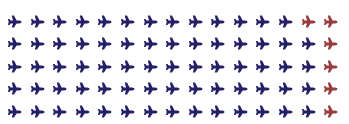

In [45]:
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#232066", "#983D3D"),
                values=df['boo_fatalidade'].value_counts(),
                icons='plane', icon_size=12,
                legend={'loc': 'upper left', 'bbox_to_anchor': (10,10)},
                icon_legend=True
                )
fig.set_tight_layout(False)
plt.show();

#### POR MÊS

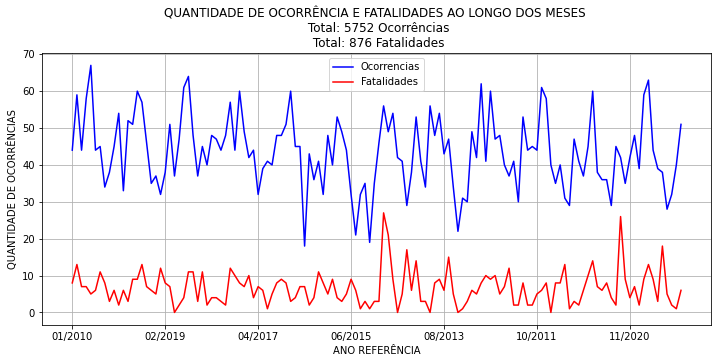

In [46]:
df = df_ocorrencias.copy()
df['ocorrencia_dia'] = df['ocorrencia_dia'].apply(lambda x: x[3:])
df_acidentes = df.groupby('ocorrencia_dia').size()
df_acidentes.plot(color='blue', figsize=(12,5), grid=True)
df_fatalidades = df.join(df_aeronave).groupby('ocorrencia_dia')['aeronave_fatalidades_total'].sum()
df_fatalidades.plot(color='red', figsize=(12,5), grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIA E FATALIDADES AO LONGO DOS MESES \n Total: ' + str(df_acidentes.sum()) + ' Ocorrências\n Total: '+ str(df_fatalidades.sum()) + ' Fatalidades')
plt.xlabel('ANO REFERÊNCIA')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.legend(['Ocorrencias', 'Fatalidades'])
plt.show()

##### Analisando Sesonalidade

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



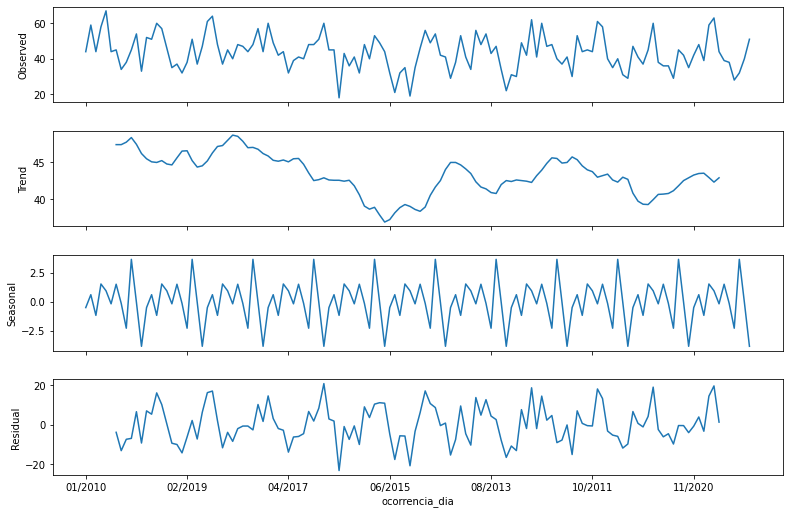

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df_acidentes, freq=12)
fig = decomp.plot();
fig.set_size_inches(12,8)


#### Ocorrencias Mensalmente

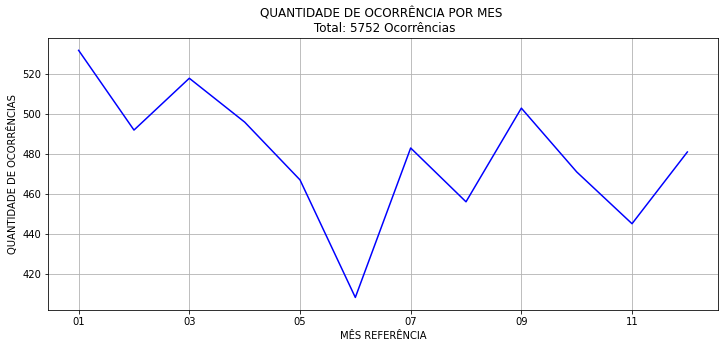

In [48]:
df = df_ocorrencias.copy()
df['ocorrencia_dia'] = df['ocorrencia_dia'].apply(lambda x: x[3:5])
df_acidentes = df.groupby('ocorrencia_dia').size()
df_acidentes.plot(color='blue', figsize=(12,5), grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIA POR MES \n Total: ' + str(df_acidentes.sum()) + ' Ocorrências')
plt.xlabel('MÊS REFERÊNCIA')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()

In [49]:
import numpy as np

print(f'O mês com mais acidentes durante esse periodo é o mês {np.argmax(df_acidentes) + 1}')
print(f'O mês com menos acidentes durante esse periodo é o mês {np.argmin(df_acidentes) + 1}')
print(f'Julho tem proporcinalmente\
  {round( 1 - (min(df_acidentes) / max(df_acidentes)), 2) * 100}\
% menos casos do que o mês de Janeiro')

O mês com mais acidentes durante esse periodo é o mês 1
O mês com menos acidentes durante esse periodo é o mês 6
Julho tem proporcinalmente  23.0% menos casos do que o mês de Janeiro


In [50]:
min(df_acidentes)

408

In [51]:
df_acidentes.mean()

479.3333333333333

In [52]:
df.join(df_aeronave).groupby('ocorrencia_dia')['aeronave_fatalidades_total'].sum()

ocorrencia_dia
01     76
02     85
03     55
04     72
05     71
06     49
07    108
08     58
09     75
10     56
11     96
12     75
Name: aeronave_fatalidades_total, dtype: int64

### OCORRÊNCIAS POR HORA DO DIA

Text(0, 0.5, 'QUANTIDADE DE OCORRÊNCIAS')

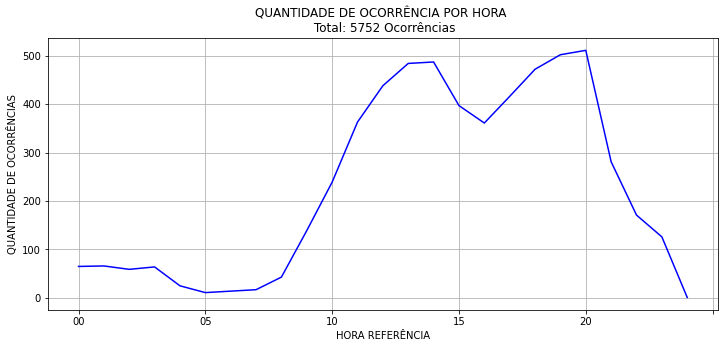

In [53]:
df = df_ocorrencias.copy()
df['ocorrencia_hora'] = df['ocorrencia_hora'].apply(lambda x: str(x)[:2])
df_acidentes = df.groupby('ocorrencia_hora').size()
df_acidentes.plot(color='blue', figsize=(12,5), grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIA POR HORA \n Total: ' + str(df_acidentes.sum()) + ' Ocorrências')
plt.xlabel('HORA REFERÊNCIA')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')

### OCORRÊNCIAS POR TIPO DE OPERAÇÃO

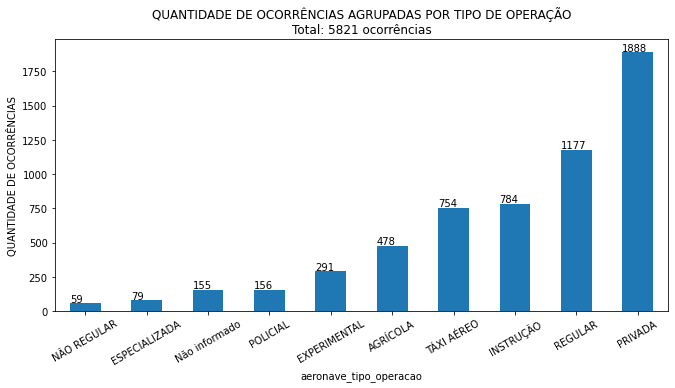

In [54]:
df = df_ocorrencias.join(df_aeronave).groupby('aeronave_tipo_operacao').size()
ax = df.sort_values().plot(kind='bar', figsize=(11,5))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), (b.x0, b.y1 + 10))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR TIPO DE OPERAÇÃO\nTotal: '+str(df.sum())+' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=30)
plt.show()

### OCORRENCIAS POR TIPO 2013 X 2016

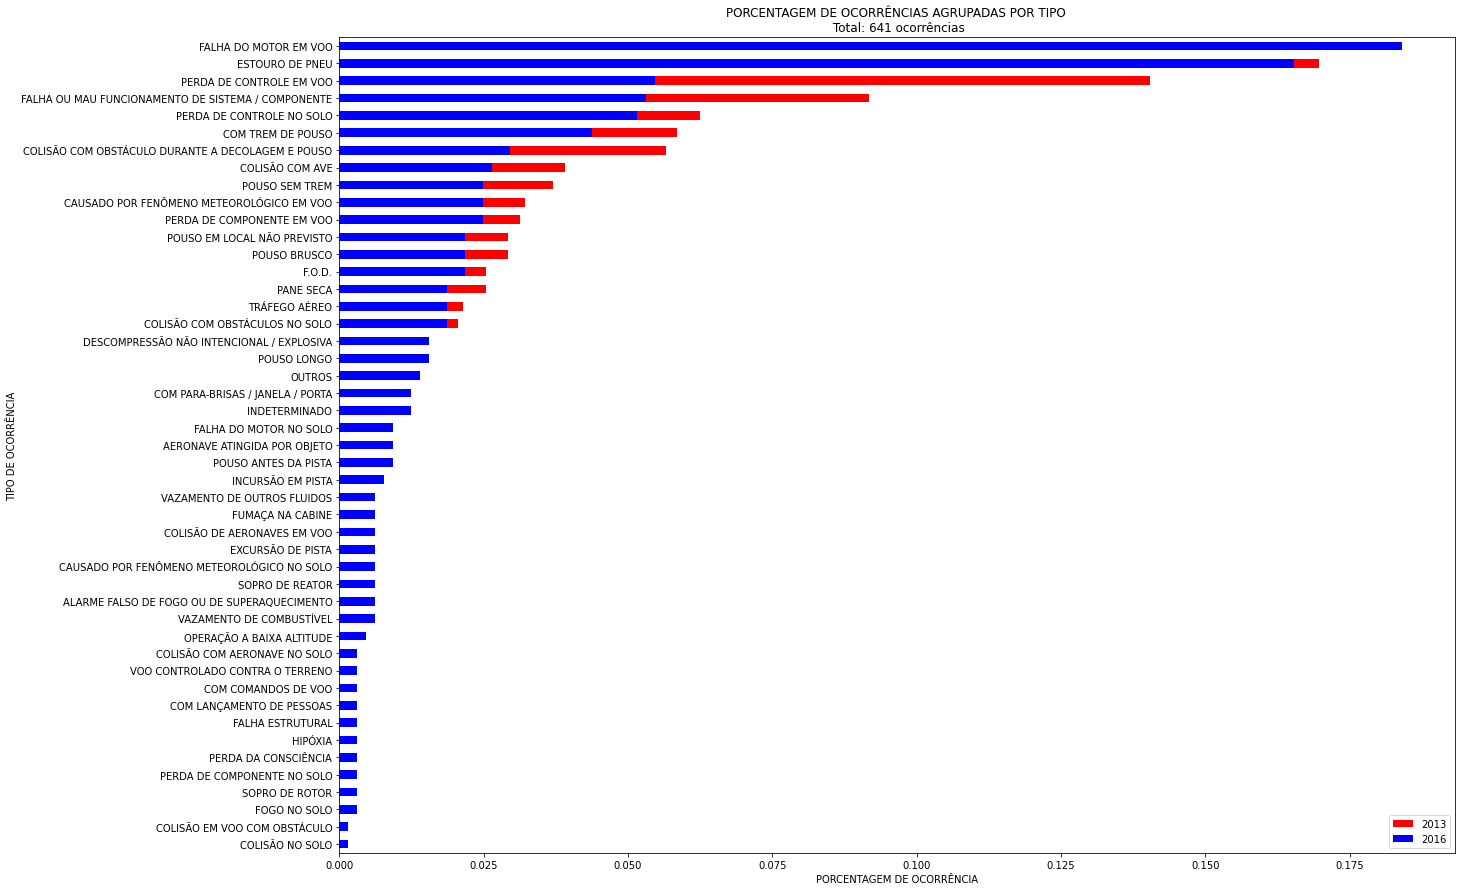

In [55]:
df = df_ocorrencias.copy()
df['ocorrencia_dia'] = df['ocorrencia_dia'].apply(lambda x: x[-4:])
df_2016= df.loc[df['ocorrencia_dia'] == '2016']
df_2013= df.loc[df['ocorrencia_dia'] == '2013']

df = df_2013.join(df_tipo_ocorrencia).groupby('ocorrencia_tipo').size()
ax = (df/ df.sum()).sort_values().plot(kind='barh', color='red', figsize=(20,15))


df = df_2016.join(df_tipo_ocorrencia).groupby('ocorrencia_tipo').size()
ax = (df/ df.sum()).sort_values().plot(kind='barh', color='blue', figsize=(20,15))


plt.title('PORCENTAGEM DE OCORRÊNCIAS AGRUPADAS POR TIPO \n Total: ' + str(df.sum()) + ' ocorrências')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('PORCENTAGEM DE OCORRÊNCIA')
plt.legend(['2013', '2016'])
plt.show()

### COMPARÇÃO 2013 X 2016

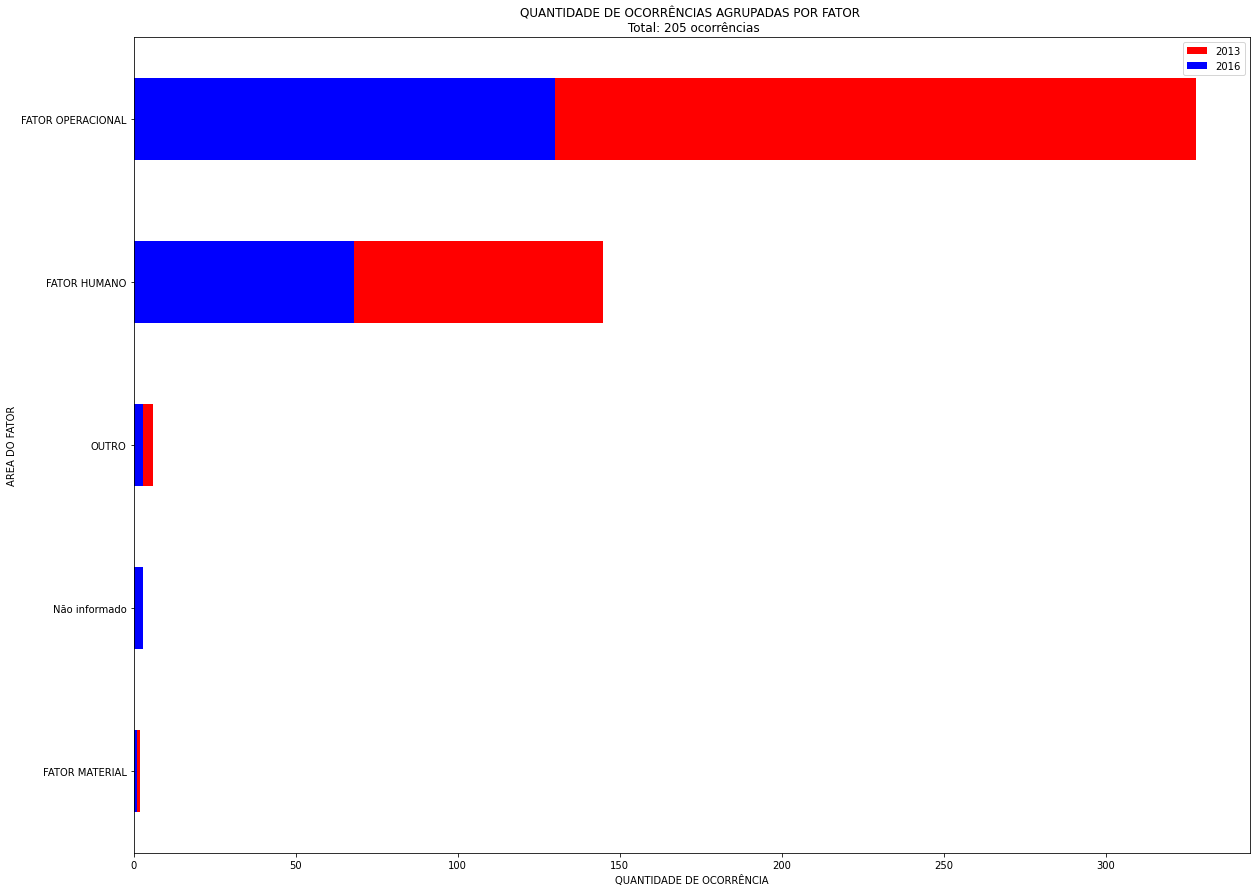

In [94]:
df = df_ocorrencias.copy()
df['ocorrencia_dia'] = df['ocorrencia_dia'].apply(lambda x: x[-4:])
df_2016= df.loc[df['ocorrencia_dia'] == '2016']
df_2013= df.loc[df['ocorrencia_dia'] == '2013']

df = df_2013.join(df_fator).groupby('fator_area').size()
ax = df.sort_values().plot(kind='barh', color='red', figsize=(20,15))


df = df_2016.join(df_fator).groupby('fator_area').size()
ax = df.sort_values().plot(kind='barh', color='blue', figsize=(20,15))


plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR FATOR \n Total: ' + str(df.sum()) + ' ocorrências')
plt.ylabel('AREA DO FATOR')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
plt.legend(['2013', '2016'])
plt.show()

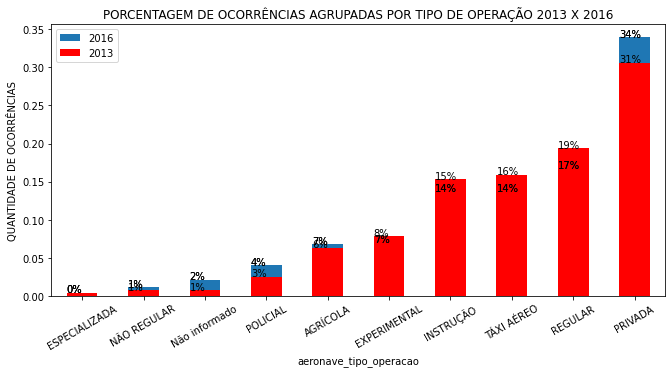

In [72]:
df = df_ocorrencias.copy()
df['ocorrencia_dia'] = df['ocorrencia_dia'].apply(lambda x: x[-4:])
df_2016= df.loc[df['ocorrencia_dia'] == '2016']
df_2013= df.loc[df['ocorrencia_dia'] == '2013']


df_2016 = df_2016.join(df_aeronave).groupby('aeronave_tipo_operacao').size()
ax = (df_2016/ df_2016.sum()).sort_values().plot(kind='bar', figsize=(11,5))
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format((b.y1 + b.y0)*100) + '%', (b.x0, b.y1))


df_2013 = df_2013.join(df_aeronave).groupby('aeronave_tipo_operacao').size()
ax = (df_2013/ df_2013.sum()).sort_values().plot(kind='bar', color='red', figsize=(11,5))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format((b.y1 + b.y0) * 100) + '%', (b.x0, b.y1))

plt.title('PORCENTAGEM DE OCORRÊNCIAS AGRUPADAS POR TIPO DE OPERAÇÃO 2013 X 2016')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.legend(['2016', '2013'])
plt.xticks(rotation=30)
plt.show()

In [97]:
df_2016 = pd.read_csv('https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/dados-estatisticos/arquivos/resumo_anual_2016.csv', sep=';', error_bad_lines=False, encoding = "ISO-8859-1")
df_2013 = pd.read_csv('https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/dados-estatisticos/arquivos/resumo_anual_2013.csv', sep=';', error_bad_lines=False, encoding = "ISO-8859-1")

In [90]:
print('Numero de voos que constam no relatorio da ANAC em 2016: ', len(df_2016))
print('Numero de voos que constam no relatorio da ANAC em 2013: ', len(df_2013))
print('Diminuição percentual da quantidade de voos: ', 
      round((len(df_2013) - len(df_2016))/len(df_2013) * 100, 2), '%')

Numero de voos que constam no relatorio da ANAC em 2016:  39505
Numero de voos que constam no relatorio da ANAC em 2013:  47589
Diminuição percentual da quantidade de voos:  16.99 %


In [58]:
df_2013.dtypes

EMPRESA (SIGLA)                       object
EMPRESA (NOME)                        object
EMPRESA (NACIONALIDADE)               object
ANO                                    int64
MÊS                                    int64
AEROPORTO DE ORIGEM (SIGLA)           object
AEROPORTO DE ORIGEM (NOME)            object
AEROPORTO DE ORIGEM (UF)              object
AEROPORTO DE ORIGEM (REGIÃO)          object
AEROPORTO DE ORIGEM (PAÍS)            object
AEROPORTO DE ORIGEM (CONTINENTE)      object
AEROPORTO DE DESTINO (SIGLA)          object
AEROPORTO DE DESTINO (NOME)           object
AEROPORTO DE DESTINO (UF)             object
AEROPORTO DE DESTINO (REGIÃO)         object
AEROPORTO DE DESTINO (PAÍS)           object
AEROPORTO DE DESTINO (CONTINENTE)     object
NATUREZA                              object
GRUPO DE VOO                          object
PASSAGEIROS PAGOS                    float64
PASSAGEIROS GRÁTIS                   float64
CARGA PAGA (KG)                      float64
CARGA GRÁT

In [60]:
df_2013.groupby('MÊS').size()

MÊS
1     3937
2     3994
3     4056
4     3865
5     4004
6     4134
7     4023
8     3738
9     3669
10    3828
11    3852
12    4489
dtype: int64

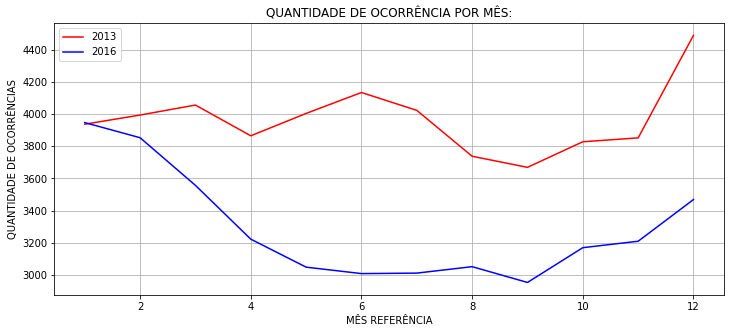

In [99]:
df_2013.groupby('MÊS').size().plot(color='red', figsize=(12,5), grid=True)
df_2016.groupby('MÊS').size().plot(color='blue', figsize=(12,5), grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIA POR MÊS:')
plt.xlabel('MÊS REFERÊNCIA')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.legend(['2013', '2016'])
plt.show()

In [96]:
list_2013 = df_2013.groupby("MÊS").size()
print(f'O mês com mais voôs em 2013 é o mês {np.argmax(list_2013) + 1}')
print(f'O mês com menos voôs em 2013 o mês {np.argmin(list_2013) + 1}')
print(f'Setembro tem proporcinalmente\
  {round( 1 - (min(list_2013) / max(list_2013)), 2) * 100}\
% menos voôs do que o mês de Dezembro')

KeyError: ignored

In [62]:
list_2016 = df_2016.groupby("MÊS").size()
print(f'O mês com mais voôs em 2016 é o mês {np.argmax(list_2016) + 1}')
print(f'O mês com menos voôs em 2016 o mês {np.argmin(list_2016) + 1}')
print(f'Setembro tem proporcinalmente\
  {round( 1 - (min(list_2016) / max(list_2016)), 2) * 100}\
% menos casos do que o mês de Janeiro')

O mês com mais voôs em 2016 é o mês 1
O mês com menos voôs em 2016 o mês 9
Setembro tem proporcinalmente  25.0% menos casos do que o mês de Janeiro


### OCORRENCIAS COM MAIS FATALIDADES

In [63]:
df = df_ocorrencias.join(df_aeronave)

df.sort_values('aeronave_fatalidades_total', ascending=False).head()

,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_pais,ocorrencia_dia,ocorrencia_hora,total_aeronaves_envolvidas,aeronave_fabricante,aeronave_modelo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
codigo_ocorrencia,,,,,,,,,,,,,,,,,,
44796,ACIDENTE,PE,BRASIL,13/07/2011,09:54:00,1,AIRCRAFT INDUSTRIES,L410UVP-E20,TURBOÉLICE,BIMOTOR,21.0,2010.0,AVIÃO,REGULAR,DECOLAGEM,REGULAR,DESTRUÍDA,16
47142,ACIDENTE,PA,BRASIL,12/03/2013,12:30:00,1,EMBRAER,EMB-820C CARAJA,TURBOÉLICE,BIMOTOR,10.0,1986.0,AVIÃO,TÁXI AÉREO,CIRCUITO DE TRÁFEGO,TÁXI AÉREO,SUBSTANCIAL,10
65490,ACIDENTE,PR,BRASIL,31/07/2016,23:57:00,1,EMBRAER,EMB-820C NAVAJO,PISTÃO,BIMOTOR,8.0,1976.0,AVIÃO,PARTICULAR,DESCIDA,PRIVADA,DESTRUÍDA,8
46202,ACIDENTE,MG,BRASIL,28/07/2012,10:45:00,1,HAWKER BEECHCRAFT,B200,TURBOÉLICE,BIMOTOR,11.0,2008.0,AVIÃO,PARTICULAR,APROXIMAÇÃO FINAL,PRIVADA,DESTRUÍDA,8
45819,ACIDENTE,GO,BRASIL,08/05/2012,19:30:00,1,AGUSTA,AW119MKII,TURBOEIXO,MONOMOTOR,8.0,2010.0,HELICÓPTERO,ADMINISTRAÇÃO DIRETA,MANOBRA,POLICIAL,DESTRUÍDA,8


ANALISE FASE DA OCORRENCIA JANEIRO X JULHO

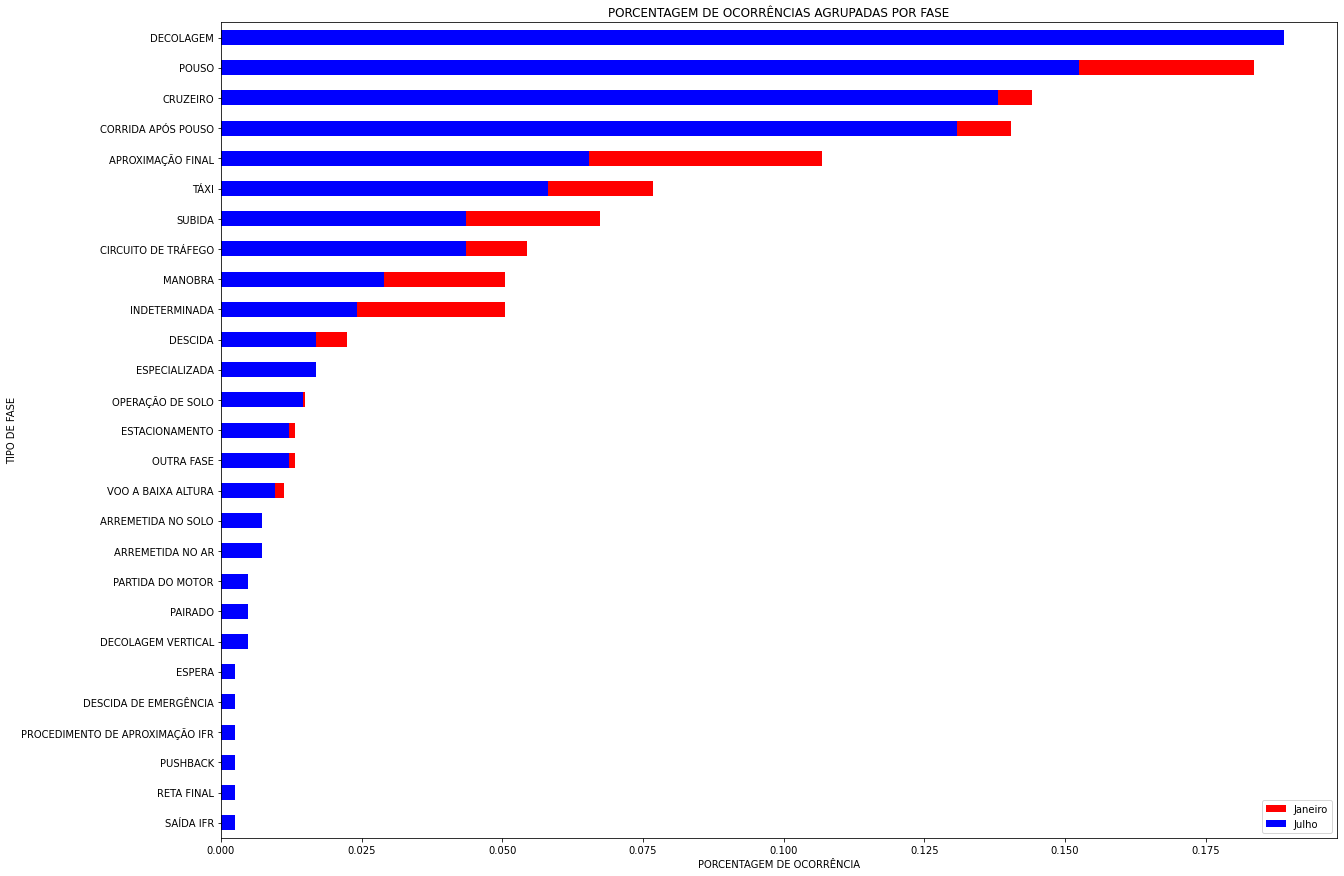

In [64]:
df = df_ocorrencias.copy()
df['ocorrencia_dia'] = df['ocorrencia_dia'].apply(lambda x: x[3:5])
df_JAN = df.loc[df['ocorrencia_dia'] == '01']
df_JUL = df.loc[df['ocorrencia_dia'] == '06']


df = df_JAN.join(df_aeronave).groupby('aeronave_fase_operacao').size()
ax = (df/ df.sum()).sort_values().plot(kind='barh', color='red', figsize=(20,15))

df = df_JUL.join(df_aeronave).groupby('aeronave_fase_operacao').size()
ax = (df/ df.sum()).sort_values().plot(kind='barh', color='blue', figsize=(20,15))


plt.title('PORCENTAGEM DE OCORRÊNCIAS AGRUPADAS POR FASE')
plt.ylabel('TIPO DE FASE')
plt.xlabel('PORCENTAGEM DE OCORRÊNCIA')
plt.legend(['Janeiro', 'Julho'])
plt.show()

In [65]:
df = df_JAN.join(df_aeronave).groupby('aeronave_fase_operacao').size() 

In [66]:
(df /df.sum()).sort_values()

aeronave_fase_operacao
CHEQUE DE MOTOR OU ROTOR           0.001873
RETA FINAL                         0.001873
PUSHBACK                           0.001873
PROCEDIMENTO DE APROXIMAÇÃO IFR    0.001873
EMPREGO MILITAR                    0.001873
Não informado                      0.001873
PARTIDA DO MOTOR                   0.003745
DECOLAGEM VERTICAL                 0.003745
OPERAÇÃO DE SOLO                   0.003745
ESTACIONAMENTO                     0.005618
ARREMETIDA NO SOLO                 0.005618
ARREMETIDA NO AR                   0.011236
OUTRA FASE                         0.013109
VOO A BAIXA ALTURA                 0.013109
CIRCUITO DE TRÁFEGO                0.014981
INDETERMINADA                      0.016854
DESCIDA                            0.022472
ESPECIALIZADA                      0.050562
APROXIMAÇÃO FINAL                  0.050562
MANOBRA                            0.054307
SUBIDA                             0.067416
TÁXI                               0.076779
CORRIDA A